In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from scipy import stats

df_test = pd.read_csv("https://raw.githubusercontent.com/marioproia/Progetto_DM1/master/Test_HR_Employee_Attrition.csv?token=ANVE7JLUER3W3JV3UGB3EMC7V23RA")
df_train = pd.read_csv("https://raw.githubusercontent.com/marioproia/Progetto_DM1/master/Train_HR_Employee_Attrition.csv?token=ANVE7JJR2LXUAEARHY3CNH27V23SQ")

frame = [df_test, df_train]
df3 = pd.concat(frame)
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,27.0,Yes,Travel_Frequently,763,Sales,15,2,Medical,1,Male,...,4,80.0,2,7,1.0,2,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,Male,...,1,NaN,3,10,2.0,3,8.0,0,0,0
2,56.0,No,Non-Travel,150,Research & Development,2,4,Technical Degree,4,Male,...,3,80.0,1,12,2.0,2,13.0,3,1,4
3,41.0,Yes,NaN,359,Human Resources,18,5,Human Resources,4,Male,...,3,80.0,0,2,4.0,3,3.0,0,0,0
4,42.0,No,NaN,642,Research & Development,1,3,Life Sciences,4,Male,...,1,NaN,1,12,6.0,3,5.0,3,1,0


**DATA UNDERSTANDING**

In [91]:
#HO AGGIUNTO PER PROVA "MonthlyIncome", "YearsWithCurrManager", "YearsSinceLastPromotion", "TrainingTimesLastYear", "NumCompaniesWorked", "MaritalStatus"
       
new_df = df3[['Age', 'Attrition', 'BusinessTravel',  'Department', 'DistanceFromHome', 'Education', 'EducationField','HourlyRate',
       'EnvironmentSatisfaction','Gender',  'JobLevel',  'JobSatisfaction', 'OverTime', 'PercentSalaryHike', 'WorkLifeBalance',
        "MonthlyIncome", "TrainingTimesLastYear", "NumCompaniesWorked", "MaritalStatus", "PerformanceRating", 
        'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', "YearsWithCurrManager","YearsSinceLastPromotion"]]

new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion
0,27.0,Yes,Travel_Frequently,Sales,15,2,Medical,59,1,Male,...,4298.0,1.0,6,Divorced,3.0,7,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,...,5304.0,2.0,2,Married,4.0,10,8.0,0,0,0
2,56.0,No,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,...,6306.0,2.0,2,Divorced,4.0,12,13.0,3,4,1
3,41.0,Yes,NaN,Human Resources,18,5,Human Resources,89,4,Male,...,6430.0,4.0,0,Married,3.0,2,3.0,0,0,0
4,42.0,No,NaN,Research & Development,1,3,Life Sciences,76,4,Male,...,2766.0,6.0,3,Married,4.0,12,5.0,3,0,1


In [92]:
new_df = new_df.replace(to_replace="Yes", value=1, inplace=False, limit=None, regex=False, method='pad')
new_df = new_df.replace(to_replace="No", value=0, inplace=False, limit=None, regex=False, method='pad')

new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion
0,27.0,1,Travel_Frequently,Sales,15,2,Medical,59,1,Male,...,4298.0,1.0,6,Divorced,3.0,7,2.0,2,2,2
1,30.0,1,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,...,5304.0,2.0,2,Married,4.0,10,8.0,0,0,0
2,56.0,0,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,...,6306.0,2.0,2,Divorced,4.0,12,13.0,3,4,1
3,41.0,1,NaN,Human Resources,18,5,Human Resources,89,4,Male,...,6430.0,4.0,0,Married,3.0,2,3.0,0,0,0
4,42.0,0,NaN,Research & Development,1,3,Life Sciences,76,4,Male,...,2766.0,6.0,3,Married,4.0,12,5.0,3,0,1


In [93]:
new_df = new_df.replace(to_replace="Divorced", value=0, inplace=False, limit=None, regex=False, method='pad')
new_df = new_df.replace(to_replace="Married", value=2, inplace=False, limit=None, regex=False, method='pad')
new_df = new_df.replace(to_replace="Single", value=1, inplace=False, limit=None, regex=False, method='pad')

new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion
0,27.0,1,Travel_Frequently,Sales,15,2,Medical,59,1,Male,...,4298.0,1.0,6,0,3.0,7,2.0,2,2,2
1,30.0,1,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,...,5304.0,2.0,2,2,4.0,10,8.0,0,0,0
2,56.0,0,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,...,6306.0,2.0,2,0,4.0,12,13.0,3,4,1
3,41.0,1,NaN,Human Resources,18,5,Human Resources,89,4,Male,...,6430.0,4.0,0,2,3.0,2,3.0,0,0,0
4,42.0,0,NaN,Research & Development,1,3,Life Sciences,76,4,Male,...,2766.0,6.0,3,2,4.0,12,5.0,3,0,1


In [94]:
#Percentuale di valori mancanti per ogni colonna
round((new_df.isnull().sum()/len(new_df))*100, 2) 

Age                        14.42
Attrition                   0.00
BusinessTravel              8.91
Department                  0.00
DistanceFromHome            0.00
Education                   0.00
EducationField              0.00
HourlyRate                  0.00
EnvironmentSatisfaction     0.00
Gender                      5.10
JobLevel                    0.00
JobSatisfaction             0.00
OverTime                    0.00
PercentSalaryHike           0.00
WorkLifeBalance             0.00
MonthlyIncome              19.05
TrainingTimesLastYear      19.86
NumCompaniesWorked          0.00
MaritalStatus               0.00
PerformanceRating          11.70
TotalWorkingYears           0.00
YearsAtCompany              5.03
YearsInCurrentRole          0.00
YearsWithCurrManager        0.00
YearsSinceLastPromotion     0.00
dtype: float64

In [95]:
#Riempio i valori mancanti
valori = {"Age": new_df["Age"].mean(),
          "Gender": "Male", 
          "BusinessTravel": "Travel_Rarely", 
          "YearsAtCompany": new_df["YearsAtCompany"].median(),
          "TrainingTimesLastYear": new_df["TrainingTimesLastYear"].median(),
          "PerformanceRating": new_df["PerformanceRating"].median()}

new_df = new_df.fillna(value=valori)

#Separo new_df in due dataset, uno filtrato per Male e uno per Female 
male_df = new_df[new_df["Gender"] == "Male"]
female_df = new_df[new_df["Gender"] == "Female"]

print(male_df["Gender"].value_counts())
print(female_df["Gender"].value_counts())

#Sostituisco i valori vuoti di MonthlyIncome con la mediana per Male
male_income = {"MonthlyIncome": 4865.5}
male_df = male_df.fillna(value=male_income)

print(male_df["Gender"].isnull().sum())

#Sostituisco i valori vuoti di MonthlyIncome con la mediana per Female
female_income = {"MonthlyIncome": 5197.0}
female_df = female_df.fillna(value=female_income)

print(female_df["Gender"].isnull().sum())

#Riunisco i dataset che avevo separato, con tutti i missing values riempiti
frame = [male_df, female_df]
new_df = pd.concat(frame)

new_df.isnull().sum()

Male    916
Name: Gender, dtype: int64
Female    554
Name: Gender, dtype: int64
0
0


Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
HourlyRate                 0
EnvironmentSatisfaction    0
Gender                     0
JobLevel                   0
JobSatisfaction            0
OverTime                   0
PercentSalaryHike          0
WorkLifeBalance            0
MonthlyIncome              0
TrainingTimesLastYear      0
NumCompaniesWorked         0
MaritalStatus              0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsWithCurrManager       0
YearsSinceLastPromotion    0
dtype: int64

In [96]:
new_df.describe()

,Age,Attrition,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,...,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,37.115262,0.161224,9.192517,2.912925,65.891156,2.721769,2.063946,2.728571,0.282993,15.209524,...,6252.169388,2.848299,2.693197,1.235374,3.136054,11.279592,6.844898,4.229252,4.123129,2.187755
std,8.388795,0.367863,8.106864,1.024165,20.329428,1.093082,1.106940,1.102846,0.450606,3.659938,...,4302.229894,1.168328,2.498009,0.790757,0.342963,7.780782,5.894849,3.623137,3.568136,3.222430
min,18.000000,0.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,...,1009.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,0.000000,12.000000,...,3482.750000,2.000000,1.000000,1.000000,3.000000,6.000000,3.000000,2.000000,2.000000,0.000000
50%,37.115262,0.000000,7.000000,3.000000,66.000000,3.000000,2.000000,3.000000,0.000000,14.000000,...,4865.500000,3.000000,2.000000,1.000000,3.000000,10.000000,5.000000,3.000000,3.000000,1.000000
75%,42.000000,0.000000,14.000000,4.000000,83.750000,4.000000,3.000000,4.000000,1.000000,18.000000,...,6775.250000,3.000000,4.000000,2.000000,3.000000,15.000000,9.000000,7.000000,7.000000,3.000000
max,60.000000,1.000000,29.000000,5.000000,100.000000,4.000000,5.000000,4.000000,1.000000,25.000000,...,19999.000000,6.000000,9.000000,2.000000,4.000000,40.000000,40.000000,18.000000,17.000000,15.000000


In [97]:
corrMatrix = new_df.corr()
corrMatrix.head()

,Age,Attrition,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,...,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion
Age,1.000000,-0.013544,0.014153,0.006700,0.032777,0.020272,0.023950,-0.055259,-0.028224,-0.017884,...,0.441972,-0.013009,-0.010238,-0.016222,-0.004982,0.012147,0.291000,0.026449,0.004219,0.004630
Attrition,-0.013544,1.000000,0.077924,-0.031373,-0.006846,-0.103369,-0.169105,-0.103481,0.246118,-0.013478,...,-0.003332,-0.022249,0.043494,-0.011195,0.025657,-0.171063,0.023155,-0.160545,-0.156199,-0.033019
DistanceFromHome,0.014153,0.077924,1.000000,0.021042,0.031131,-0.016075,0.005303,-0.003669,0.025514,0.040235,...,-0.004870,0.004523,-0.029251,0.021916,-0.020690,0.004628,0.024129,0.018845,0.014406,0.010029
Education,0.006700,-0.031373,0.021042,1.000000,0.016775,-0.027128,0.101589,-0.011296,-0.020322,-0.011111,...,0.008144,0.001469,0.126317,0.000107,0.033751,0.148280,0.028093,0.060236,0.069065,0.054254
HourlyRate,0.032777,-0.006846,0.031131,0.016775,1.000000,-0.049857,-0.027853,-0.071335,-0.007782,-0.009062,...,-0.014079,-0.010498,0.022157,0.026198,0.003492,-0.002334,0.000257,-0.024106,-0.020123,-0.026716


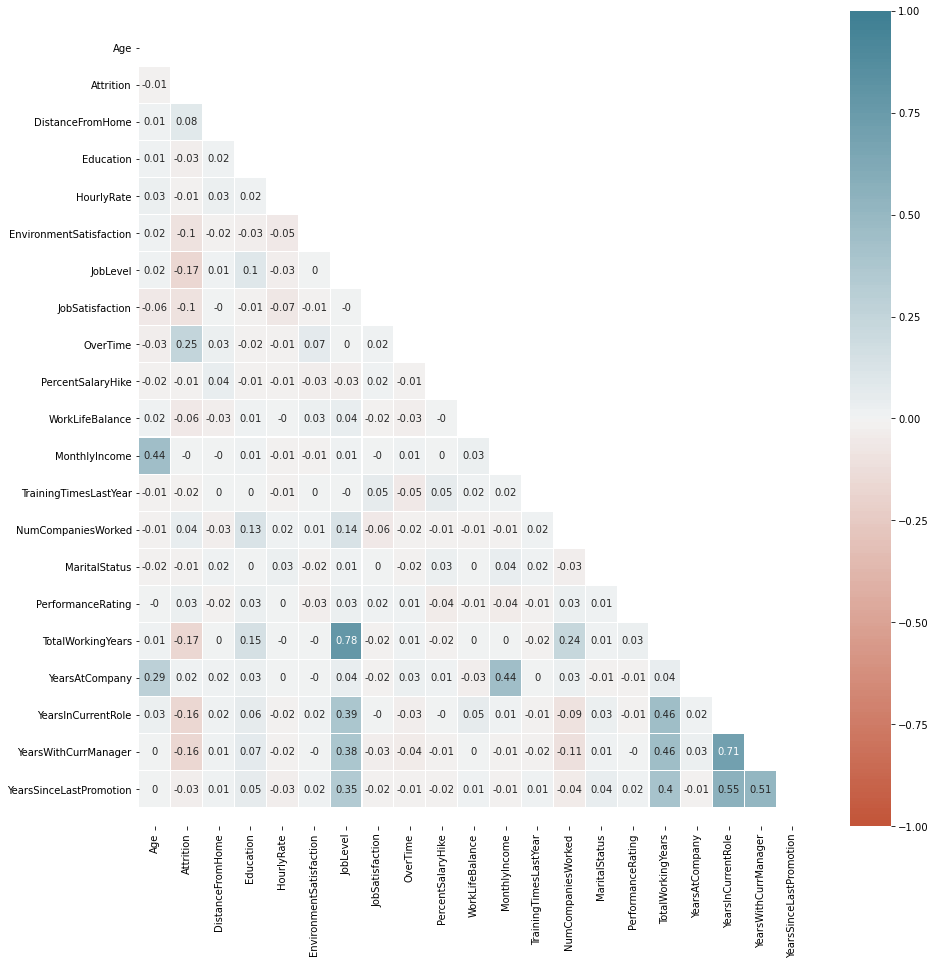

In [98]:
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
fig, ax = plt.subplots(figsize=(15,15))

sn.heatmap(
    corrMatrix.round(2), 
    annot=True,
    annot_kws={"size":10},
    cmap=sn.diverging_palette(20, 220, n=200), 
    vmin=-1, 
    vmax=1, 
    center=0,
    linewidth=0.1,
    mask=mask,
    ax=ax)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

plt.show()

fig.savefig("corrMat_senza")

In [99]:
medie = new_df.groupby(new_df["Attrition"])
medie.mean()

,Age,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,WorkLifeBalance,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion
Attrition,,,,,,,,,,,,,,,,,,,,
0,37.165058,8.915653,2.927007,65.952149,2.771290,2.145985,2.778589,0.234388,15.231144,2.781022,6258.451744,2.859692,2.645580,1.239254,3.132198,11.862936,6.785077,4.484185,4.367397,2.234388
1,36.856198,10.632911,2.839662,65.573840,2.464135,1.637131,2.468354,0.535865,15.097046,2.658228,6219.485232,2.789030,2.940928,1.215190,3.156118,8.244726,7.156118,2.902954,2.852321,1.945148


[]

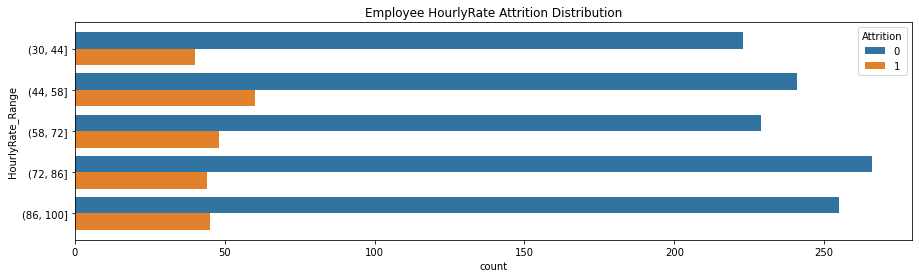

In [100]:
new_df['HourlyRate_Range']=pd.cut(new_df['HourlyRate'],[30,44,58,72,86,100])

f, ax = plt.subplots(figsize=(15, 4))
sn.countplot(y='HourlyRate_Range', hue='Attrition',data=new_df).set_title('Employee HourlyRate Attrition Distribution')
plt.plot()

[]

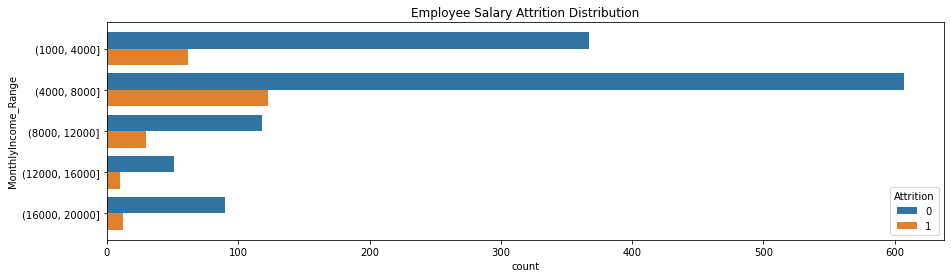

In [101]:
new_df['MonthlyIncome_Range']=pd.cut(new_df['MonthlyIncome'],[1000,4000,8000,12000,16000,20000])

f, ax = plt.subplots(figsize=(15, 4))
sn.countplot(y='MonthlyIncome_Range',hue='Attrition',data=new_df).set_title('Employee Salary Attrition Distribution')
plt.plot()

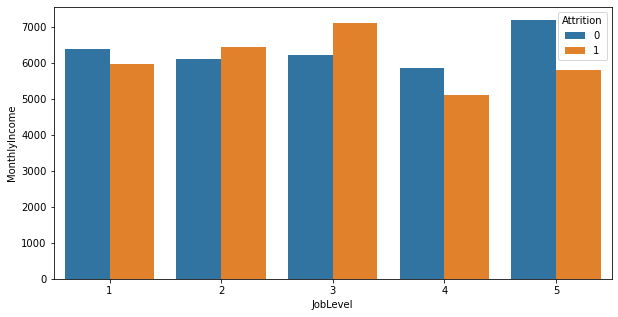

In [102]:
fig=plt.figure(figsize=(10,5))
sn.barplot(x='JobLevel',y='MonthlyIncome',hue='Attrition', data=new_df, ci=None).set_title("")
plt.show()

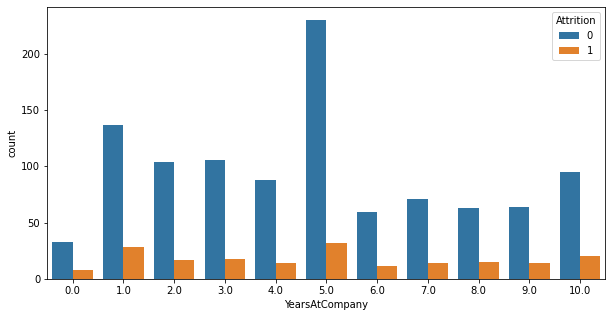

In [103]:
fig=plt.figure(figsize=(10,5))
value=new_df['YearsAtCompany']<11
df=new_df[value]

sn.countplot(x='YearsAtCompany',hue='Attrition',data=df)

plt.show()

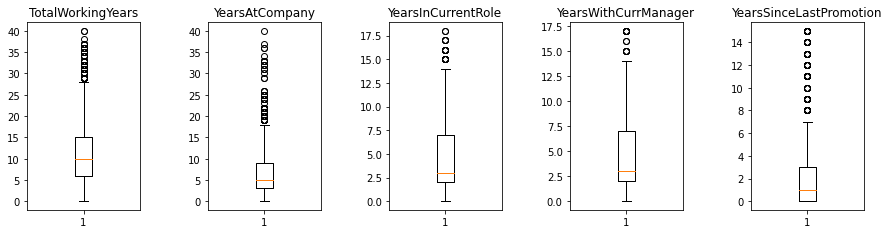

In [116]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 20)) 
fig_dims = (4,5)
fig.subplots_adjust(hspace=0.6, wspace=0.6)

'''
# Plot Age
plt.subplot2grid(fig_dims, (0,0))
plt.boxplot(new_df["MonthlyIncome"])
plt.title("MonthlyIncome")
'''

# Plot DistanceFromHome
plt.subplot2grid(fig_dims, (0,0))
plt.boxplot(new_df["TotalWorkingYears"])
plt.title("TotalWorkingYears")


# Plot HourlyRate
plt.subplot2grid(fig_dims, (0,1))
plt.boxplot(new_df["YearsAtCompany"])
plt.title("YearsAtCompany")


# Plot PercentSalaryHike
plt.subplot2grid(fig_dims, (0,2))
plt.boxplot(new_df["YearsInCurrentRole"])
plt.title("YearsInCurrentRole")


# Plot TotalWorkingYears
plt.subplot2grid(fig_dims, (0,3))
plt.boxplot(new_df["YearsWithCurrManager"])
plt.title("YearsWithCurrManager")


# Plot YearsAtCompany
plt.subplot2grid(fig_dims, (0,4))
plt.boxplot(new_df["YearsSinceLastPromotion"])
plt.title("YearsSinceLastPromotion")

plt.show()

fig.savefig(fname="boxplot")